In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
%matplotlib inline

In [ ]:
price=pd.read_csv("/content/drive/MyDrive/homeprices.csv")
price

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


Text(0, 0.5, 'price')

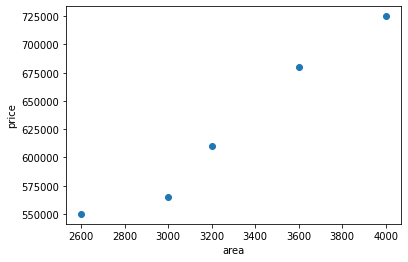

In [ ]:
plt.scatter(price['area'],price['price'])
plt.xlabel('area')
plt.ylabel('price')

In [ ]:
km=KMeans(n_clusters=2)
y_predicted=km.fit_predict(price[['area','price']])
y_predicted

array([0, 0, 0, 1, 1], dtype=int32)

In [ ]:
price['cluster']=y_predicted
price.head()

,area,price,cluster
0,2600,550000,0
1,3000,565000,0
2,3200,610000,0
3,3600,680000,1
4,4000,725000,1


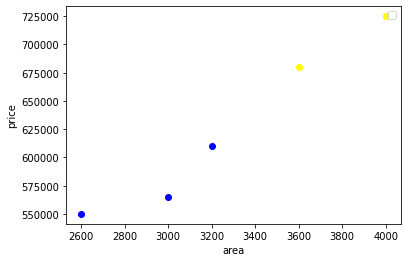

In [ ]:
df1=price[price.cluster==0]
df2=price[price.cluster==1]
plt.scatter(df1['area'],df1['price'],color='blue')
plt.scatter(df2['area'],df2['price'],color='yellow')
plt.xlabel("area")
plt.ylabel("price")
plt.legend()

In [ ]:
scaler=MinMaxScaler()

scaler.fit(price[['area']])
price['area']=scaler.transform(price[['area']])


scaler.fit(price[['price']])
price['price']=scaler.transform(price[['price']])


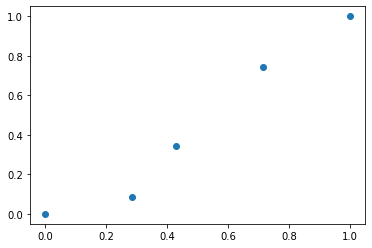

In [ ]:
plt.scatter(price['area'],price['price'])

In [ ]:
km=KMeans(n_clusters=2)
y_predicted=km.fit_predict(price[['area','price']])
y_predicted

array([1, 1, 1, 0, 0], dtype=int32)

In [ ]:
price['cluster']=y_predicted
price.head()

,area,price,cluster
0,0.000000,0.000000,1
1,0.285714,0.085714,1
2,0.428571,0.342857,1
3,0.714286,0.742857,0
4,1.000000,1.000000,0


In [ ]:
km.cluster_centers_

array([[0.85714286, 0.87142857],
       [0.23809524, 0.14285714]])

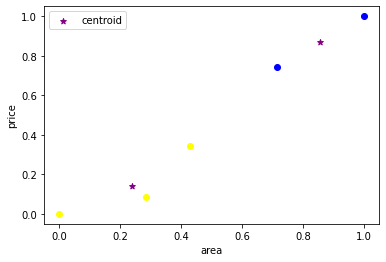

In [ ]:
df1=price[price.cluster==0]
df2=price[price.cluster==1]
plt.scatter(df1['area'],df1['price'],color='blue')
plt.scatter(df2['area'],df2['price'],color='yellow')
plt.xlabel("area")
plt.ylabel("price")
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()

In [ ]:
sse=[]
k_rng=range(1,5)
for k in k_rng:
  km=KMeans(n_clusters=k)
  km.fit(price[['area','price']])
  sse.append(km.inertia_)

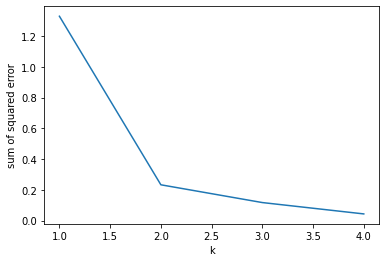

In [ ]:
plt.xlabel("k")
plt.ylabel("sum of squared error")
plt.plot(k_rng,sse)